In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_train[0].shape

(28, 28)

5


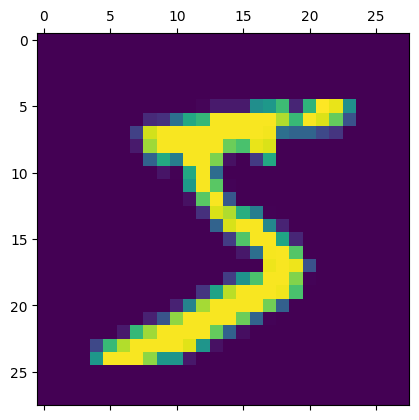

In [5]:
plt.matshow(x_train[0])
print(y_train[0])
plt.show()

In [6]:
x_train_flattend=x_train.reshape(len(x_train),28*28)
x_test_flattend=x_test.reshape(len(x_test),28*28)

In [7]:
x_train_flattend.shape

(60000, 784)

In [8]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [9]:
x_train_flattend=SC.fit_transform(x_train_flattend)
x_test_flattend=SC.transform(x_test_flattend)

In [18]:
#Here are 10 digit 0 to 9 so output nueron is 10 and in a image is 784 pixel so we have input nueron is 784
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

# Note:-
keras.layer.Flatten(input_shape(28,28))
    """we can give above line when this is not already flattened then keras.layers.Dense(10,activation="sigmoid")
    now there is no use of giving input_shape """ 

In [20]:
# optimizer just allow you to train efficintelly. it allow you to reach global optima in efficient way
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics=["accuracy"] 
             )

In [21]:
model.fit(x_train_flattend,y_train,epochs=5)# epoch is the number of iteration of which neural network is going to run the training 

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4352 - accuracy: 0.8883
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3238 - accuracy: 0.9175
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3024 - accuracy: 0.9222
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2872 - accuracy: 0.9251
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2772 - accuracy: 0.9261


In [22]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3744 - accuracy: 0.9219


[0.37440139055252075, 0.9218999743461609]

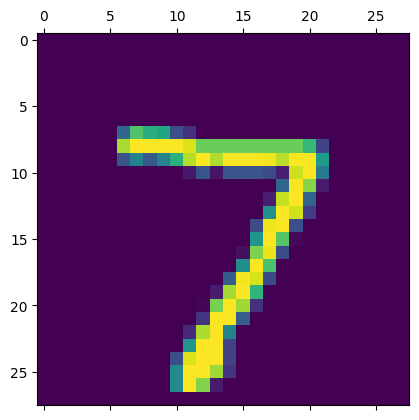

In [22]:
plt.matshow(x_test[0])
plt.show()

In [23]:
y_predict=model.predict(x_test_flattend)
y_predict[0]

313/313 [==============================] - 0s 1ms/step


array([0.94720167, 0.00201089, 0.0074814 , 0.99957716, 0.09793738,
       0.87548786, 0.00478588, 0.999999  , 0.5870095 , 0.98608464],
      dtype=float32)

In [24]:
np.argmax(y_predict[0])# argmax is used to find the max valuse and give the index of that value

7

In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predict ]

In [26]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
con_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
con_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    1,    2,    0,    8,   12,    4,    2,    0],
       [   0, 1098,    5,    1,    1,    1,    5,    2,   22,    0],
       [  11,    4,  922,   13,   10,    5,   13,    8,   42,    4],
       [   4,    0,   23,  902,    0,   37,    4,    9,   24,    7],
       [   1,    2,    6,    1,  903,    0,   16,    3,   11,   39],
       [   7,    2,    1,   24,   10,  786,   15,   10,   32,    5],
       [  14,    3,    4,    1,    7,   14,  910,    2,    3,    0],
       [   2,   11,   23,    7,    3,    2,    0,  945,    0,   35],
       [   8,    5,    6,   20,   10,   25,   10,   12,  869,    9],
       [   8,    5,    2,   12,   25,    7,    0,   20,    9,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

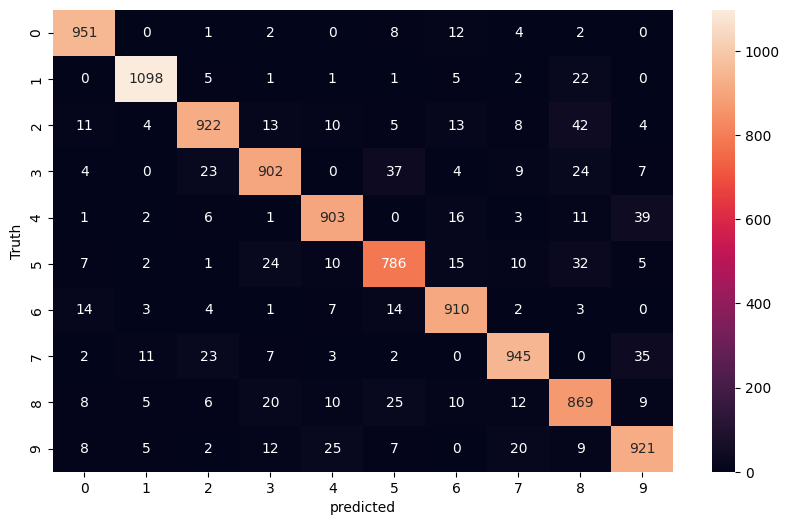

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

# Adding hidden layer

In [29]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [40]:
# below line is records all the logs and use for visuallize on the tensorboard

# optimizer can be adam or SGD
model.compile(optimizer="SGD",
              loss= "sparse_categorical_crossentropy",
              metrics=["accuracy"] 
             )

In [41]:
model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0083 - accuracy: 0.9988
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0080 - accuracy: 0.9988
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0077 - accuracy: 0.9989
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0074 - accuracy: 0.9990
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0071 - accuracy: 0.9991


In [33]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9690


[0.16879452764987946, 0.968999981880188]